# PROBLEM 1
## Simple Sampling

You are not allowed to use sampling libraries/functions. But you can use rand() call to generate a pseudo-uniform value in [0,1]; you can also use a library that computes the pdf(x|params). make sure to recap first Rejection Sampling and Inverse Transform Sampling

### A. Implement simple sampling from continuous distributions: uniform (min, max, sample_size) and gaussian (mu, sigma, sample_size)

In [213]:
from sklearn.datasets import fetch_20newsgroups
import random as rand
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
from wordcloud import WordCloud

In [6]:
rand.seed= 1

In [2]:
def load_20ng():
    X_train, y_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    X_test, y_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    
    return X_train, y_train, X_test, y_test

In [51]:
def uniform_sample(x_min, x_max, num_samples):
    arr = []
    
    for i in range(num_samples):
        arr.append(x_min + (x_max-x_min) * rand.random())
    return arr

In [38]:
uniform_sample(0,99,20)

[22.518722941507686,
 2.4113936969368766,
 75.63075716027228,
 44.626502701813294,
 51.38192447238165,
 17.40750451599183,
 94.46755689267123,
 23.20146039638303,
 26.38772211825573,
 80.78613428541766,
 18.533537208301627,
 72.01832157045077,
 22.104404605407286,
 81.57104445163674,
 74.09838123258413,
 94.69302817933782,
 21.07708671443,
 48.435376068583636,
 86.3130098725333,
 39.508050503389484]

(array([ 9867.,  9892.,  9979., 10051., 10075., 10064., 10042., 10002.,
        10092.,  9936.]),
 array([30.00005239, 36.90000431, 43.79995622, 50.69990814, 57.59986006,
        64.49981197, 71.39976389, 78.29971581, 85.19966773, 92.09961964,
        98.99957156]),
 <BarContainer object of 10 artists>)

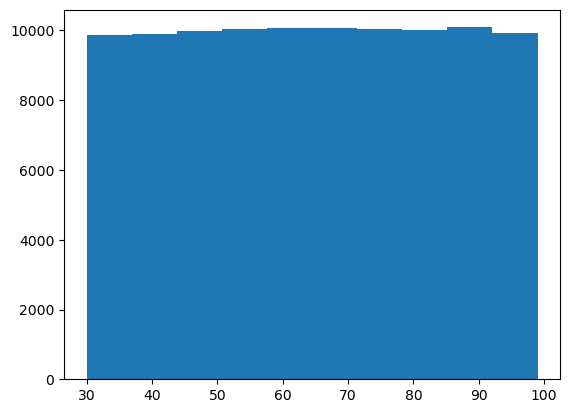

In [39]:
plt.hist(uniform_sample(30,99,100000))

(array([  5.,  24.,  82., 173., 256., 232., 126.,  73.,  22.,   7.]),
 array([-3.15609057, -2.5117738 , -1.86745704, -1.22314027, -0.57882351,
         0.06549325,  0.70981002,  1.35412678,  1.99844354,  2.64276031,
         3.28707707]),
 <BarContainer object of 10 artists>)

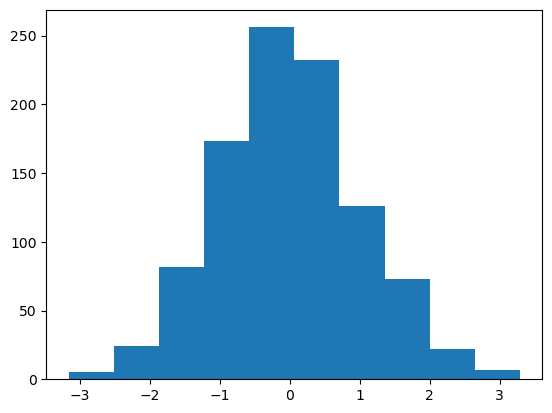

In [50]:
mu = 0
sigma = 1
num_samples = 1000
def gaussian_pdf(x, mu, sigma):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

def rejection_sampling_gaussian(mu, sigma, num_samples):
    samples = []
    max_pdf = gaussian_pdf(mu, mu, sigma)  # The maximum value of the Gaussian PDF occurs at x = mu

    while len(samples) < num_samples:
        # Generate a random sample from the uniform distribution in the desired range
        x = rand.uniform(mu - 4 * sigma, mu + 4 * sigma)  # 4 * sigma covers approximately 99.7% of the distribution
        y = rand.uniform(0, max_pdf)

        # Accept the sample if the uniform random value (y) is less than the Gaussian PDF at x
        if y <= gaussian_pdf(x, mu, sigma):
            samples.append(x)

    return samples

gaussian_samples = rejection_sampling_gaussian(mu, sigma, num_samples)
plt.hist(gaussian_samples)

### B. Implement sampling from a 2-dim Gaussian Distribution (2d mu, 2d sigma, sample_size)

In [84]:
def uniform_2d(x_min, x_max, y_min, y_max, num_samples):
    arr = []
    for i in range(num_samples):
        arr.append([x_min + (x_max-x_min) * rand.random(), y_min + (y_max-y_min) * rand.random()])
    return arr

In [88]:
x_coords, y_coords = zip(*uniform_2d(30, 99, 50, 99, 1000))

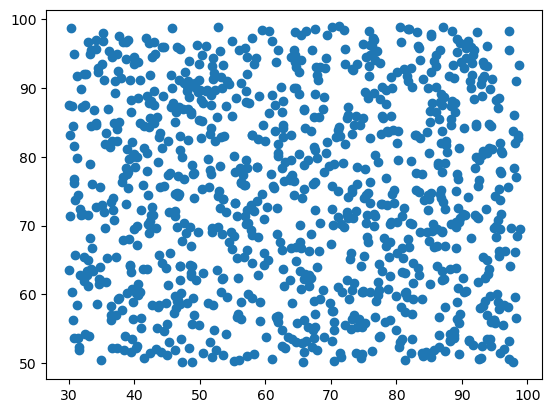

In [89]:
plt.scatter(x_coords, y_coords)

In [95]:
# 2D Gaussian PDF
def gaussian_pdf_2d(x1, x2, mu1, mu2, sigma1, sigma2):
    coef = 1 / (2 * math.pi * sigma1 * sigma2)
    exp1 = -0.5 * ((x1 - mu1) / sigma1) ** 2
    exp2 = -0.5 * ((x2 - mu2) / sigma2) ** 2
    return coef * math.exp(exp1 + exp2)

# Rejection sampling for 2D Gaussian distribution
def rejection_sampling_gaussian_2d(mu1, mu2, sigma1, sigma2, num_samples):
    samples = []
    max_pdf = gaussian_pdf_2d(mu1, mu2, mu1, mu2, sigma1, sigma2)

    while len(samples) < num_samples:
        x1 = rand.uniform(mu1 - 4 * sigma1, mu1 + 4 * sigma1)
        x2 = rand.uniform(mu2 - 4 * sigma2, mu2 + 4 * sigma2)
        y = rand.uniform(0, max_pdf)

        if y <= gaussian_pdf_2d(x1, x2, mu1, mu2, sigma1, sigma2):
            samples.append((x1, x2))

    return samples

In [96]:
mu1, mu2 = 0,0
sigma1, sigma2 = 1,1
num_samples = 1000
gaussian_samples_2d = rejection_sampling_gaussian_2d(mu1, mu2, sigma1, sigma2, num_samples)

In [98]:
x_coords, y_coords = zip(*gaussian_samples_2d)

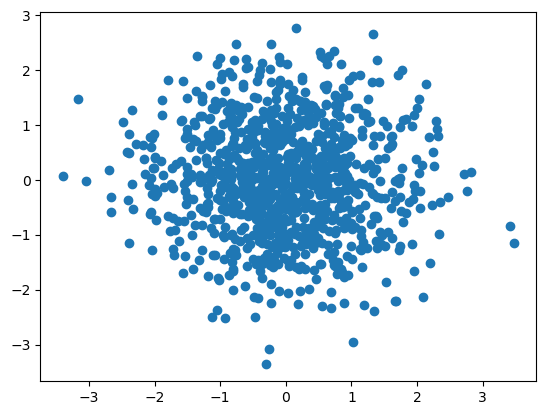

In [99]:
plt.scatter(x_coords, y_coords)

### C. Implement wihtout-replacement sampling from a discrete non-uniform distribution (given as input) following the Steven's method described in class ( paper ). Test it on desired sample sizes N significantly smaller than population size M (for example N=20 M=300)

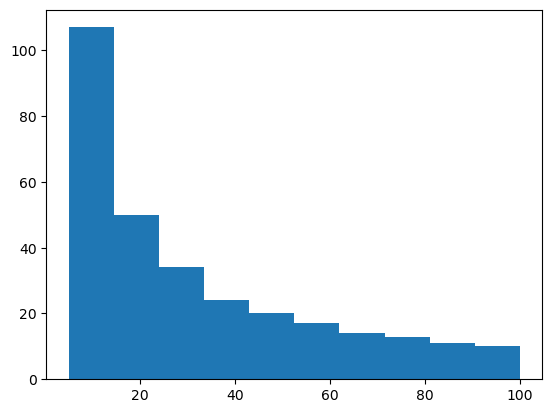

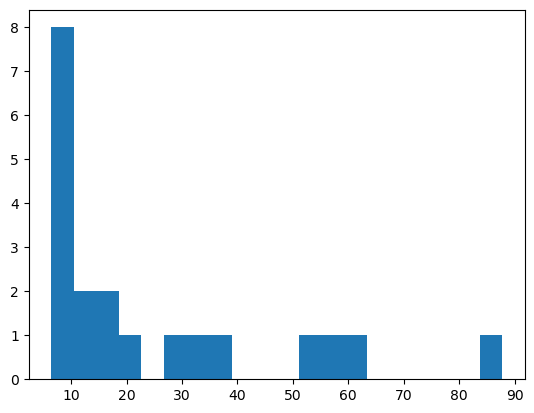

In [225]:
rand.seed = 44
def assign_to_groups(M, weights):
    max_group = max(weights)
    groups = [None] * M

    for i in range(M):
        group = weights[i] * max_group // max(weights)
        groups[i] = group

    return groups


def stevens_method(N, M, weights):
    groups = assign_to_groups(M, weights)
    
    group_counts = {}
    for group in groups:
        if group not in group_counts:
            group_counts[group] = 0
        group_counts[group] += 1

    total_group_count = sum(group_counts.values())
    relative_group_weights = {k: v / total_group_count for k, v in group_counts.items()}
    
    selected = set()
    while len(selected) < N:
        group_index = rand.choices(list(relative_group_weights.keys()), list(relative_group_weights.values()), k=1)[0]
        group_elements = [i for i in range(M) if groups[i] == group_index]
        index = rand.choice(group_elements)
        selected.add(index)

    return list(selected)

N = 20
M = 300
a = 100  # initial value
b = 0.99  # base
weights = [a * (b ** x) for x in range(M)]

samples = stevens_method(N, M, weights)
plt.hist(weights)
plt.show()

plt.hist([weights[i] for i in samples], bins=20)
plt.show()

# PROBLEM 2
## Conditional Sampling

Implement Gibbs Sampling for a multidim gaussian generative joint, by using the conditionals which are also gaussian distributions . The minimum requirement is for joint to have D=2 variables and for Gibbs to alternate between the two.

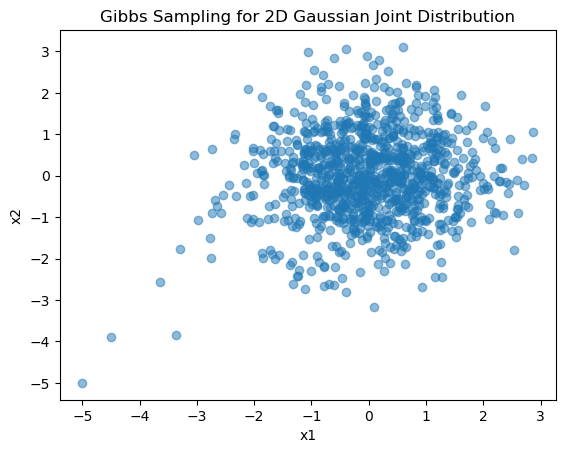

In [211]:
def conditional_mean_and_std(mu, sigma, other_value, other_index):
    current_index = 1 - other_index
    sigma_11 = sigma[current_index, current_index]
    sigma_12 = sigma[current_index, other_index]
    sigma_22 = sigma[other_index, other_index]
    
    mu_conditional = mu[current_index] + sigma_12 * (other_value - mu[other_index]) / sigma_22
    sigma_conditional = np.sqrt(sigma_11 - sigma_12**2 / sigma_22)
    
    return mu_conditional, sigma_conditional

def gibbs_sampling(mu, sigma, n_samples, initial_state):
    samples = np.zeros((n_samples, 2))
    samples[0] = initial_state
    
    for i in range(1, n_samples):
        for j in range(2):
            mu_conditional, sigma_conditional = conditional_mean_and_std(mu, sigma, samples[i-1, 1-j], 1-j)
            samples[i, j] = np.random.normal(mu_conditional, sigma_conditional)
    
    return samples

# Mean vector and covariance matrix of the 2D Gaussian joint distribution
mu = np.array([0, 0])
sigma = np.array([[1, 0.8],
                  [0.8, 1]])

n_samples = 1000
initial_state = np.array([-5, -5])

samples = gibbs_sampling(mu, sigma, n_samples, initial_state)

# Plot the sampled points
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gibbs Sampling for 2D Gaussian Joint Distribution')
plt.show()


# PROBLEM 3 
## Implement your own baby-LDA
Implement your own LDA using Gibbs Sampling, following this paper and this easy-to-read book . Gibbs Sampling is a lot slower than EM alternatives, so this can take some time; use a smaller sample of docs/words at first.
20NG train dataset 11280 docs x 53000 words
Small sonnet dataset (one per line) 154 docs x 3092 words

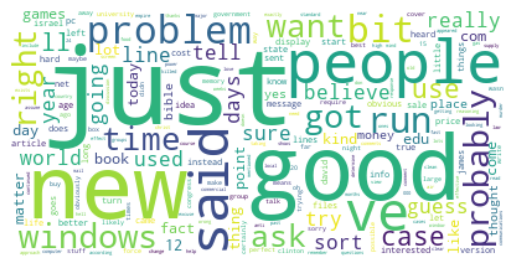

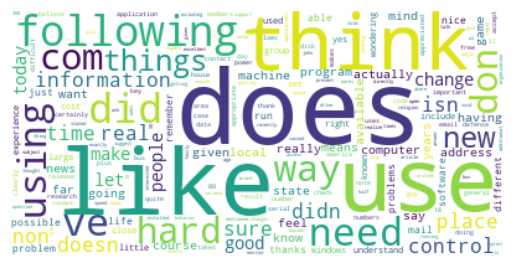

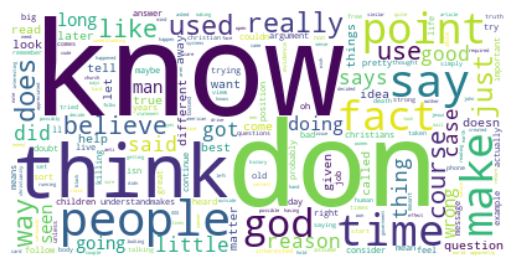

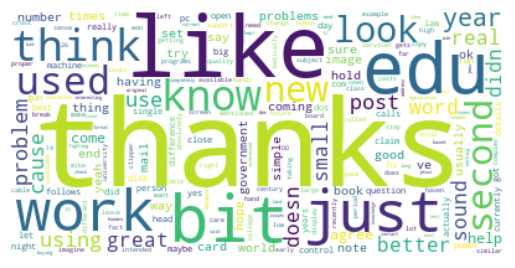

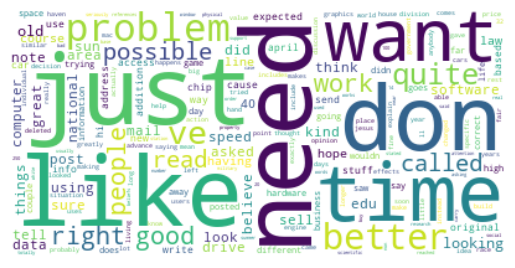

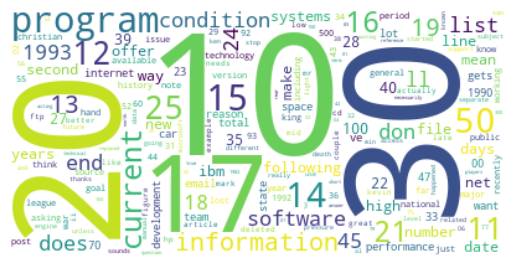

In [218]:
# Fetch the 20 Newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)

# Set sample size
sample_size = 1000

# Slice the data and target arrays
data_sample = newsgroups_train.data[:sample_size]
target_sample = newsgroups_train.target[:sample_size]

# Preprocess the text data
vectorizer = CountVectorizer(stop_words='english', min_df=5)
X = vectorizer.fit_transform(data_sample)

# Get the Vocab dictionary
Vocab = vectorizer.get_feature_names_out()

# Calculate the total number of unique words in the corpus
W = len(Vocab)

# Calculate N and DOCS
N = X.shape[0]
DOCS = X

# Set the number of topics
K = 6

# N x K matrix A[d, k]: count of times topic k is sampled for doc d
# K x W matrix B[k, w]: count of times topic k is sampled for word w

# Dirichlet uniform prior of doc over topics
alpha = 5 * np.ones((1, K))

# Dirichlet uniform prior of topic over words
beta = 2 * np.ones((1, W))

# N x W matrix Z[d, w] = k: topic k currently sampled for word w in doc d
Z = np.zeros((N, W))

# Start A as alpha prior for each doc (each row is alpha)
A = np.tile(alpha, (N, 1))

# Start B as beta prior for each topic (each row is beta)
B = np.tile(beta, (K, 1))

# K x 1 array BSUM: sum of B over all words, per topic
BSUM = np.sum(B, axis=1)

# Resample topic for each word in each doc, T = 1000 iterations
for t in range(1000):
    for d in range(N):
        for w, freq in enumerate(DOCS[d].toarray().flatten()):
            if freq == 0:
                continue
                
            zi = Z[d, w]  # current topic

            # Subtract current topic zi from counts
            if zi > 0:
                A[d, int(zi) - 1] -= 1
                B[int(zi) - 1, w] -= 1
                BSUM[int(zi) - 1] -= 1

            # Prepare Gibbs-sampling conditional distribution over topics
            dst = A[d, :] * (B[:, w] / BSUM).T

            # Sample a new topic from nonuniform discrete dst over topics
            new_zi = rand.choices(range(1, K+1), weights=dst)[0]

            # Update Z and counts
            Z[d, w] = new_zi
            A[d, new_zi - 1] += 1
            B[new_zi - 1, w] += 1
            BSUM[new_zi - 1] += 1

# Each row in A is the doc d distribution over topics (unnormalized)
# Each row in B is the topic k distribution words (unnormalized)

# Create a dictionary for each topic's word weights
for k in range(K):
    word_weights = {Vocab[w]: B[k, w] for w in range(W)}

    # Create and display the word cloud
    wc = WordCloud(background_color="white").generate_from_frequencies(word_weights)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

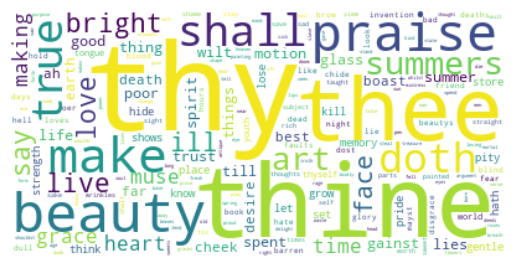

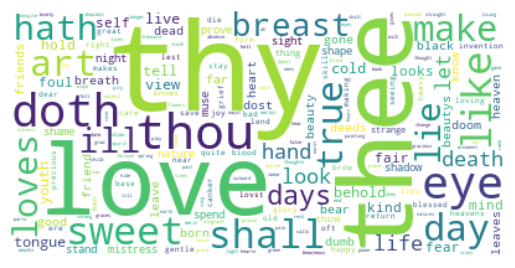

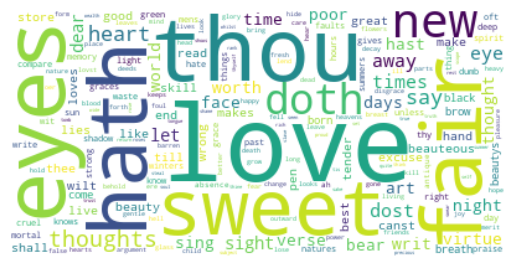

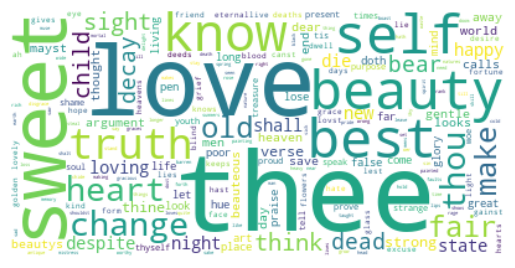

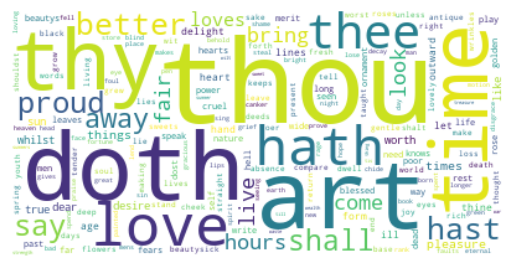

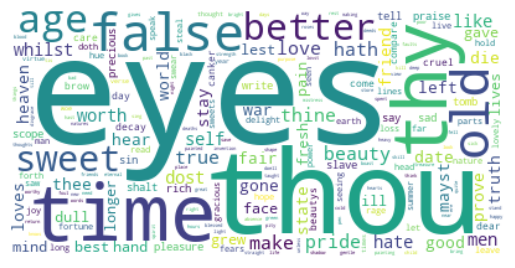

In [219]:
# Load the small sonnet dataset
with open("sonnets.txt", "r") as f:
    sonnets = f.readlines()

# Preprocess the text data
vectorizer = CountVectorizer(stop_words='english', min_df=5)
X = vectorizer.fit_transform(sonnets)

# Get the Vocab dictionary
Vocab = vectorizer.get_feature_names_out()

# Calculate the total number of unique words in the corpus
W = len(Vocab)

# Calculate N and DOCS
N = X.shape[0]
DOCS = X

# Set the number of topics
K = 6

# N x K matrix A[d, k]: count of times topic k is sampled for doc d
# K x W matrix B[k, w]: count of times topic k is sampled for word w

# Dirichlet uniform prior of doc over topics
alpha = 5 * np.ones((1, K))

# Dirichlet uniform prior of topic over words
beta = 2 * np.ones((1, W))

# N x W matrix Z[d, w] = k: topic k currently sampled for word w in doc d
Z = np.zeros((N, W))

# Start A as alpha prior for each doc (each row is alpha)
A = np.tile(alpha, (N, 1))

# Start B as beta prior for each topic (each row is beta)
B = np.tile(beta, (K, 1))

# K x 1 array BSUM: sum of B over all words, per topic
BSUM = np.sum(B, axis=1)

# Resample topic for each word in each doc, T = 1000 iterations
for t in range(1000):
    for d in range(N):
        for w, freq in enumerate(DOCS[d].toarray().flatten()):
            if freq == 0:
                continue
                
            zi = Z[d, w]  # current topic

            # Subtract current topic zi from counts
            if zi > 0:
                A[d, int(zi) - 1] -= 1
                B[int(zi) - 1, w] -= 1
                BSUM[int(zi) - 1] -= 1

            # Prepare Gibbs-sampling conditional distribution over topics
            dst = A[d, :] * (B[:, w] / BSUM).T

            # Sample a new topic from nonuniform discrete dst over topics
            new_zi = rand.choices(range(1, K+1), weights=dst)[0]

            # Update Z and counts
            Z[d, w] = new_zi
            A[d, new_zi - 1] += 1
            B[new_zi - 1, w] += 1
            BSUM[new_zi - 1] += 1

# Each row in A is the doc d distribution over topics (unnormalized)
# Each row in B is the topic k distribution words (unnormalized)

# Create a dictionary for each topic's word weights
for k in range(K):
    word_weights = {Vocab[w]: B[k, w] for w in range(W)}

    # Create and display the word cloud
    wc = WordCloud(background_color="white").generate_from_frequencies(word_weights)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()